##### 1, Import all the libraries and modules required.

In [1]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

##### 2. Build the neural network:

##### This convolution network consists of two pairs of Conv and MaxPool layers to extract features from the dataset. Which is then followed by a Flatten and Dropout layer to convert the data in 1D and ensure overfitting.

##### And hen two Dense layers for classification.



In [2]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

#### 3. Image Data Generation/Augmentation:

In [ ]:
TRAINING_DIR = "./Dataset/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./Dataset/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [ ]:
img = mpimg.imread('./Dataset/train/with_mask/3-with-mask.JPG')
print(img)

[[[227 227 219]
  [228 228 220]
  [228 228 220]
  ...
  [178 195 203]
  [189 206 213]
  [197 212 219]]

 [[229 229 221]
  [229 229 221]
  [230 230 222]
  ...
  [178 195 203]
  [189 206 213]
  [197 212 219]]

 [[231 231 223]
  [231 231 223]
  [232 232 224]
  ...
  [178 195 203]
  [189 206 213]
  [198 213 220]]

 ...

 [[215 222 228]
  [214 221 227]
  [213 220 228]
  ...
  [175 185 195]
  [175 185 195]
  [175 185 195]]

 [[214 221 227]
  [213 220 226]
  [212 219 227]
  ...
  [174 184 194]
  [174 184 194]
  [174 184 194]]

 [[213 220 226]
  [212 219 225]
  [211 218 226]
  ...
  [173 183 193]
  [173 183 193]
  [173 183 193]]]


##  sample Images

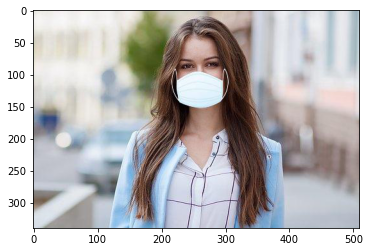

In [ ]:
imgplot = plt.imshow(img)

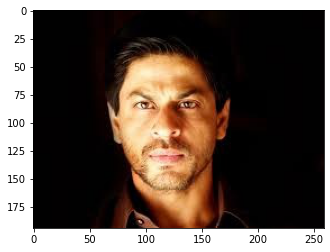

In [ ]:
img = mpimg.imread('./Dataset/train/without_mask/137.jPG')
imgplot = plt.imshow(img)

#### 4. Initialize a callback checkpoint to keep saving best model after each epoch while training:

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

##### 5. Train the model:

In [ ]:
history = model.fit(train_generator,
                              epochs=15,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/15
132/132 [==============================] - 164s 1s/step - loss: 0.6032 - acc: 0.7087 - val_loss: 0.2865 - val_acc: 0.9278
Epoch 2/15
132/132 [==============================] - 161s 1s/step - loss: 0.3435 - acc: 0.8692 - val_loss: 0.1282 - val_acc: 0.9588
Epoch 3/15
132/132 [==============================] - 160s 1s/step - loss: 0.2851 - acc: 0.8814 - val_loss: 0.1198 - val_acc: 0.9588
Epoch 4/15
132/132 [==============================] - 160s 1s/step - loss: 0.2543 - acc: 0.9011 - val_loss: 0.1736 - val_acc: 0.9330
Epoch 5/15
132/132 [==============================] - 159s 1s/step - loss: 0.2679 - acc: 0.8996 - val_loss: 0.1155 - val_acc: 0.9691
Epoch 6/15
132/132 [==============================] - 162s 1s/step - loss: 0.2720 - acc: 0.9011 - val_loss: 0.0928 - val_acc: 0.9794
Epoch 7/15
132/132 [==============================] - 167s 1s/step - loss: 0.2245 - acc: 0.9080 - val_loss: 0.1016 - val_acc: 0.9794
Epoch 8/15
132/132 [==============================] - 161s 1s/step - 

##### In this project, we have developed a deep learning model for face mask detection using Python, Keras, and OpenCV. We developed the face mask detector model for detecting whether person is wearing a mask or not. We have trained the model using Keras with network architecture. Training the model is the first part of this project and testing using webcam using OpenCV is the second part.

In [ ]:
!python test.py

^C
